<b> Adult Income Prediction

Design a Machine Learning Model on the data-set given below:

Download the dataset from this link. CLICK HERE TO DOWNLOAD DATASET

The detailed description about the dataset can be found here. Dataset Description

For your reference, kindly have a look at this jupyter notebook. CLICK HERE

If you are facing any difficulty, follow the steps mentioned below:
Step - 1 - Getting things ready for the project
Import the required libraries
Load the data
Discover and handle missing values (Similar to previous assignment)
Step - 2 - Data Preparation
Consider ‘income’ as the target variable (:P)
Remove unnecessary columns (For eg: ‘fnlwgt’)
Standardizing numerical data
Encoding categorical features
Train Test Split
Step - 3 - Train the model on Training Data
Consider ‘income’ as the target variable (-_-)
Identify the TASK in hand and choose the appropriate algorithm for the task.
Since task is Classification, use Logistic Regression
Step - 4 - Predict on Test Data
Step - 5 - Evaluate each Model
Use evaluation metrics like Accuracy, Confusion Metric, Precision and Recall.
Print classification report.
Step - 6 - Use RFE to extract the best features.
Build Logistic regression using the best features
Test and Evaluate the new model
Step - 7 - Use PCA to extract the best features and build the model again.
Since task is Classification, use Logistic Regression, Knn, DT and SVM (Create an individual model for each of the algorithm)
Test and Evaluate for each Model.
Print the Classification Report.




In [422]:
# Step-1 data understanding and Exploring

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Reading the dataset
df=pd.read_csv("adult.csv")


In [423]:
# show whole data
df


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [420]:
# head
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [424]:
df.shape

(48842, 15)

In [425]:
# missing values handling
miss=['?']
new_df=pd.read_csv('adult.csv',na_values=miss)
new_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# head data values after handling the missing values
new_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# statistical values
new_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# show all columns name
new_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [426]:
# removing missing values
new_df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [427]:
new_df.isnull().any(axis=0)

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool

In [428]:
round(100*(new_df.isnull().sum()/len(new_df.index)),2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

In [429]:
# Removing rows which having missing values
new_df.dropna(axis=0,how='any',inplace=True)

# number of rows and column after removing missing values
new_df.shape


(45222, 15)

In [430]:
# Percentage of rows with missing values

missing_values=((df.shape[0]-new_df.shape[0])/df.shape[0])*100
print(missing_values)

7.411653904426519


<b> Observation

finally after removing missing values from the rows we have 7.41% missing values in data

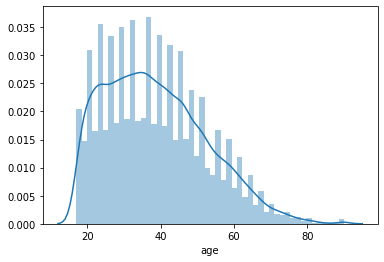

In [ ]:
sns.distplot(df['age'])
plt.show()

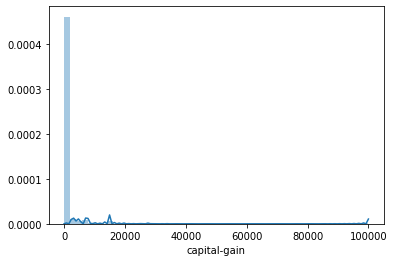

In [ ]:
sns.distplot(df['capital-gain'])
plt.show()

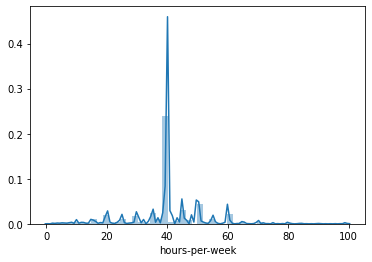

In [ ]:
sns.distplot(df['hours-per-week'])
plt.show()

<b> DATA EXPLORATION

In [431]:
# All numeric  (float,int) variables on the dataset
new_df_numeric=new_df.select_dtypes(include=['float64','int64'])
new_df_numeric.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
5,34,198693,6,0,0,30


let us make pairplot to see the linear relationship

<Figure size 1440x720 with 0 Axes>

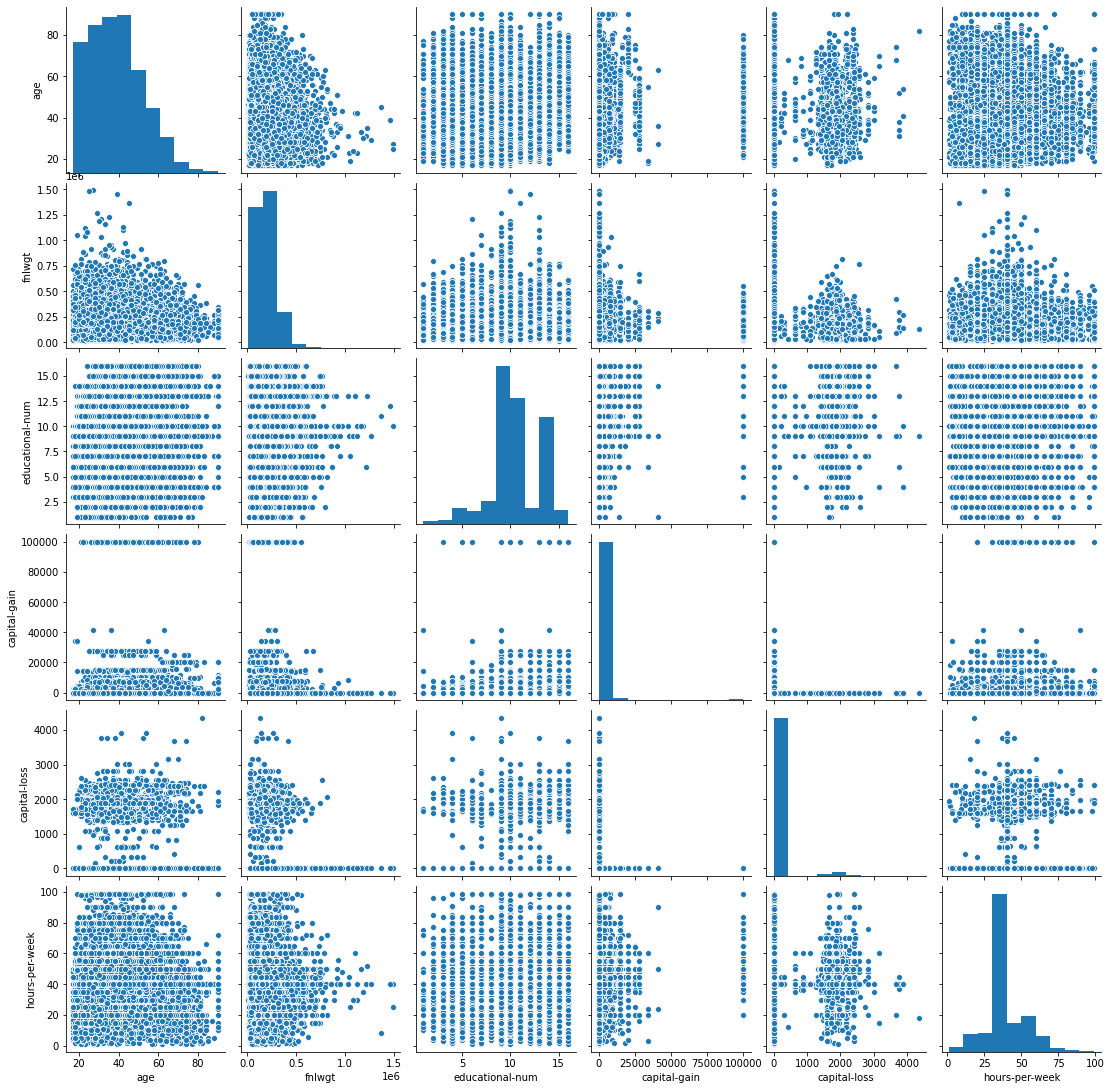

In [ ]:
# pairwise scatter plot
plt.figure(figsize=(20,10))
sns.pairplot(new_df_numeric)
plt.show()

In [ ]:
# correlation matrix
cor=new_df_numeric.corr()
cor

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.075792,0.037623,0.079683,0.059351,0.101992
fnlwgt,-0.075792,1.000000,-0.041993,-0.004110,-0.004349,-0.018679
educational-num,0.037623,-0.041993,1.000000,0.126907,0.081711,0.146206
capital-gain,0.079683,-0.004110,0.126907,1.000000,-0.032102,0.083880
capital-loss,0.059351,-0.004349,0.081711,-0.032102,1.000000,0.054195
hours-per-week,0.101992,-0.018679,0.146206,0.083880,0.054195,1.000000


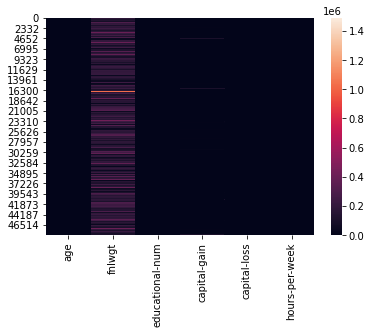

In [ ]:
sns.heatmap(new_df_numeric)

<b> DATA PREPARATION

In [432]:
# Removing 'fnlwgt' column
new_df.drop('fnlwgt',axis=1,inplace=True)
new_df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [404]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   education        45222 non-null  object
 3   educational-num  45222 non-null  int64 
 4   marital-status   45222 non-null  object
 5   occupation       45222 non-null  object
 6   relationship     45222 non-null  object
 7   race             45222 non-null  object
 8   gender           45222 non-null  object
 9   capital-gain     45222 non-null  int64 
 10  capital-loss     45222 non-null  int64 
 11  hours-per-week   45222 non-null  int64 
 12  native-country   45222 non-null  object
 13  income           45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [433]:
categorical=new_df.select_dtypes(include=['object'])
categorical.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [434]:
new_df_numeric=new_df.select_dtypes(include=['float64','int64'])
new_df_numeric.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30


In [435]:
# Scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# column names are (annoylingly) lost after scaling 
#(dataframe into numpy)
df_num=pd.DataFrame(scaler.fit_transform(new_df_numeric),columns=new_df_numeric.columns)
df_num.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942


In [436]:
# Encoding the categorical features
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(drop='first',sparse=False)

#column names are (annoyingly) lost after OneHotEncoder
#dataframe into numpy
df_cat=pd.DataFrame(encoder.fit_transform(categorical),columns=encoder.get_feature_names(categorical.columns))
df_cat.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,...,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [437]:
df1=pd.concat([df_num,df_cat],axis=1)
df1.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,...,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [438]:

y=df1.pop('income_>50K')

X=df1

In [439]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y ,train_size=0.7,random_state=100)

In [440]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(31655, 95) (31655,)
(13567, 95) (13567,)


<b> Step-3 Train the model

In [441]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
              

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [414]:
# Prediction
y_test_predict=classifier.predict(X_test)

In [415]:
y_train_predict=classifier.predict(X_train)

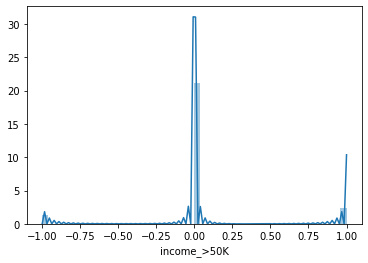

In [322]:
# Residual analysis on training data
residual=y_train-y_train_predict

sns.distplot(residual)

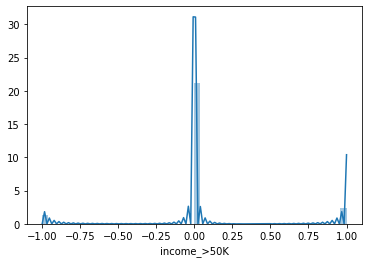

In [323]:
residual1=y_test-y_test_predict

sns.distplot(residual1)

<b> Step-4 Predict on Test Data 

In [324]:
#Making Prediction
income=pd.DataFrame({'Actual':y_test,'Prediction':y_test_predict})

income.head()

,Actual,Prediction
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,1.0


<b> Step-5 Evaluation

In [325]:
#acuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_predict)

0.8495614358369573

In [326]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_test_predict))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_test_predict))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_test_predict)))


Mean Absolute Error: 0.1504385641630427
Mean Squared Error: 0.1504385641630427
Root Mean Squared Error: 0.38786410527792164


In [327]:
# confusion matrix
con_metric=metrics.confusion_matrix(y_test,y_test_predict)
con_metric

array([[9505,  706],
       [1335, 2021]])

In [333]:
# precision and recall
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10211
         1.0       0.74      0.60      0.66      3356

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.78     13567
weighted avg       0.84      0.85      0.84     13567



<b> Step-6 RFE-Recursive Feature Elimination

In [383]:
from sklearn.feature_selection import RFE

rfe=RFE(classifier,39)
rfe=rfe.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [384]:
new=pd.DataFrame({'Columns':X_train.columns,'Include': rfe.support_,'Ranking': rfe.ranking_})
new

,Columns,Include,Ranking
0,age,False,6
1,educational-num,True,1
2,capital-gain,True,1
3,capital-loss,False,16
4,hours-per-week,False,4
...,...,...,...
90,native-country_Thailand,True,1
91,native-country_Trinadad&Tobago,True,1
92,native-country_United-States,False,27
93,native-country_Vietnam,True,1


In [385]:
imp_col=X_train.columns[rfe.support_]
imp_col

Index(['educational-num', 'capital-gain', 'education_1st-4th',
       'education_5th-6th', 'education_Preschool',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Wife', 'gender_Male', 'native-country_Canada',
       'native-country_China', 'native-country_Columbia',
       'native-country_Dominican-Republic', 'native-country_El-Salvador',
       'native-country_England', 'native-country_France',
       'native-country_Guatemala', 'native-country_Hungary',
       'native-country_Ireland', 'native-country_Italy', 'native-country_Laos',
       'native-country_Mexico', 'native-country_Peru',
       'native-co

In [386]:
X_train_new= X_train[imp_col]
X_train_new.head()

,educational-num,capital-gain,education_1st-4th,education_5th-6th,education_Preschool,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Never-married,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,relationship_Other-relative,relationship_Own-child,relationship_Wife,gender_Male,native-country_Canada,native-country_China,native-country_Columbia,native-country_Dominican-Republic,native-country_El-Salvador,native-country_England,native-country_France,native-country_Guatemala,native-country_Hungary,native-country_Ireland,native-country_Italy,native-country_Laos,native-country_Mexico,native-country_Peru,native-country_Portugal,native-country_Scotland,native-country_South,native-country_Thailand,native-country_Trinadad&Tobago,native-country_Vietnam
25079,0.345316,-0.146733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1039,-1.221559,-0.146733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35954,-0.046403,-0.146733,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35748,-2.788433,-0.146733,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38543,-0.046403,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [387]:
from sklearn.linear_model import LogisticRegression
classifier_new=LogisticRegression()
classifier_new.fit(X_train_new,y_train)
              

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

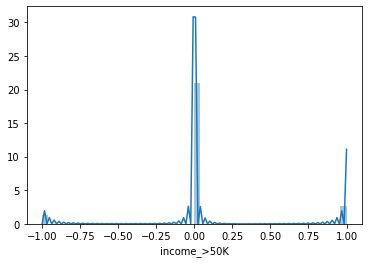

In [388]:
y_train_predict_new=classifier_new.predict(X_train_new)
residual1=y_train-y_train_predict_new
sns.distplot(residual1)

In [273]:
X_test_new=X_test[imp_col]
y_test_predict_new=classifier_new.predict(X_test_new)

In [389]:
income1=pd.DataFrame({'Actual':y_test,'predicted':y_test_predict_new})
income1

,Actual,predicted
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,0.0
...,...,...
19793,1.0,1.0
23298,1.0,1.0
2000,1.0,1.0
39689,1.0,1.0


In [390]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_test_predict_new))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_test_predict_new))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_new)))


Mean Absolute Error: 0.1602417631016437
Mean Squared Error: 0.1602417631016437
Root Mean Squared Error: 0.40030208980424237


In [391]:
print(metrics.classification_report(y_test,y_test_predict_new))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10211
         1.0       0.72      0.57      0.64      3356

    accuracy                           0.84     13567
   macro avg       0.80      0.75      0.77     13567
weighted avg       0.83      0.84      0.83     13567



In [276]:
print(metrics.r2_score(y_test,y_test_predict_new))

0.13929735734523585


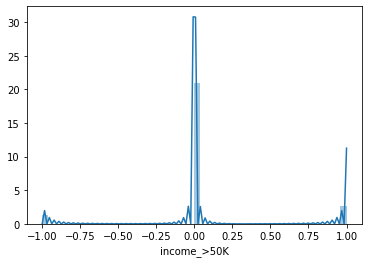

In [277]:
residual_test_new=y_test-y_test_predict_new
sns.distplot(residual_test_new)


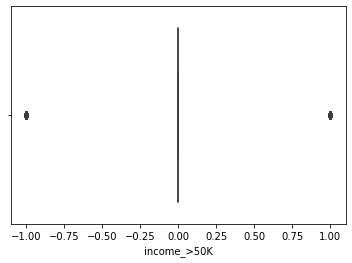

In [392]:
sns.boxplot(residual_test_new)

<b> Preparation Elimination Analysis

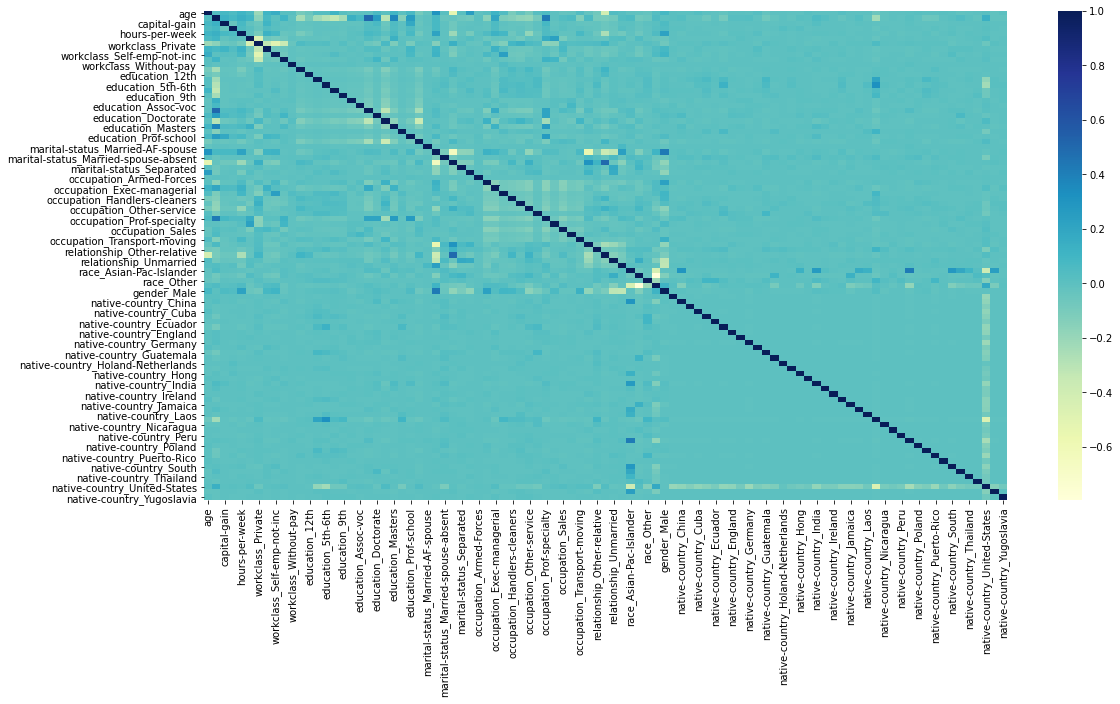

In [442]:
plt.figure(figsize=(18,9))
sns.heatmap(X_train.corr(),cmap="YlGnBu")

In [443]:
X_train.shape

(31655, 95)

<b> PCA

In [444]:
from sklearn.decomposition import PCA
pca=PCA(random_state=0)

In [445]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

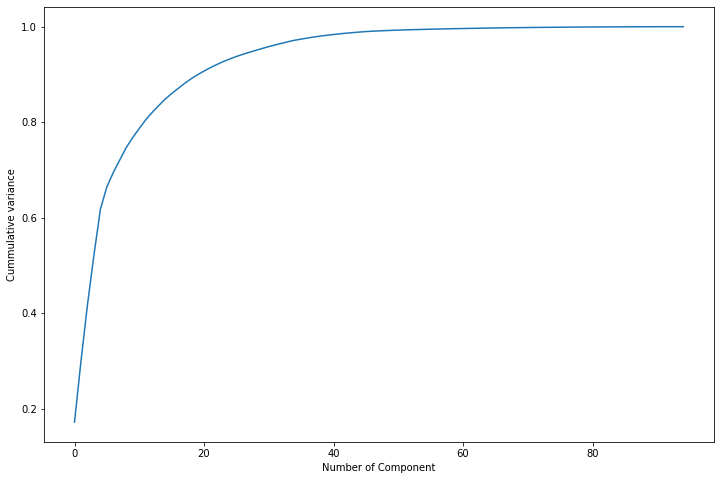

In [446]:
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Component')
plt.ylabel('Cummulative variance')
plt.show()

In [447]:
np.cumsum(pca.explained_variance_ratio_)

array([0.17209469, 0.29957921, 0.41750516, 0.52165317, 0.61795817,
       0.66488323, 0.69490688, 0.72127006, 0.74727138, 0.7680173 ,
       0.78682487, 0.80504524, 0.82060445, 0.83475912, 0.84824287,
       0.85995417, 0.87063823, 0.88122232, 0.89081766, 0.89939179,
       0.90702016, 0.91436822, 0.92093081, 0.92705973, 0.93253978,
       0.93764579, 0.94215837, 0.94636922, 0.95047   , 0.95445665,
       0.95830888, 0.9618176 , 0.96522477, 0.96857945, 0.97162644,
       0.97399569, 0.97630951, 0.97849607, 0.98042578, 0.98209484,
       0.9836655 , 0.98517006, 0.98641556, 0.98765236, 0.98877433,
       0.98979466, 0.99055719, 0.99120262, 0.99177869, 0.9923273 ,
       0.99281715, 0.99326858, 0.99367749, 0.99403505, 0.99438942,
       0.99472315, 0.99503357, 0.99534271, 0.99563967, 0.99590477,
       0.99616324, 0.99641807, 0.99666367, 0.99690372, 0.99713691,
       0.99735742, 0.99756245, 0.99774257, 0.99791853, 0.99808345,
       0.99823608, 0.99837884, 0.99851609, 0.9986477 , 0.99877

In [448]:
from sklearn.decomposition import PCA
pca_final=PCA(n_components=39 ,random_state=0)
X_train_pca=pca_final.fit_transform(X_train)

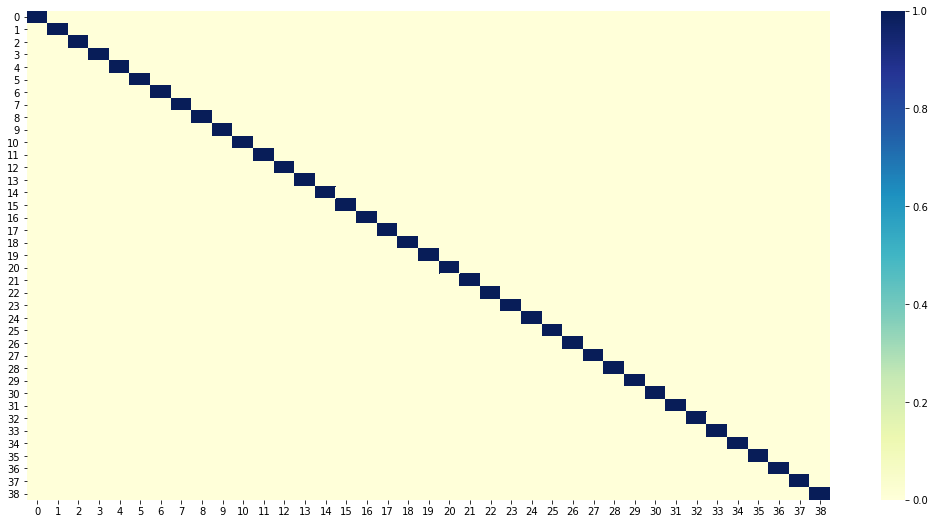

In [449]:
corrmat=np.corrcoef(X_train_pca.T)
plt.figure(figsize=(18,9))
sns.heatmap(corrmat,cmap="YlGnBu")

In [450]:
X_test_pca=pca_final.transform(X_test)

In [451]:
# Bulding the final model with 39 features
from sklearn.linear_model import LogisticRegression
classifier_pca=LogisticRegression()
classifier_pca.fit(X_train_new,y_train)
              

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

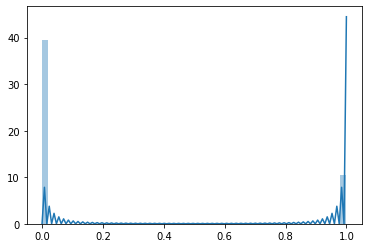

In [452]:
y_train_predict_pca=classifier_pca.predict(X_train_pca)
residual_pca=y_train_predict_pca
sns.distplot(residual_pca)

In [453]:
y_test_predict_pca=classifier_pca.predict(X_test_pca)
temp_df=pd.DataFrame({'Actual': y_test,'predicted':y_test_predict_pca})
temp_df.head()
                                        

,Actual,predicted
40273,0.0,0.0
1984,1.0,1.0
1230,1.0,1.0
25507,0.0,0.0
553,0.0,0.0


In [454]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_test_predict_pca))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_test_predict_pca))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_pca)))


Mean Absolute Error: 0.35556865924670156
Mean Squared Error: 0.35556865924670156
Root Mean Squared Error: 0.596295781677769


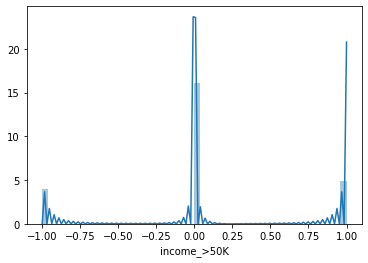

In [455]:
residual_test_pca=y_test-y_test_predict_pca
sns.distplot(residual_test_pca)

In [293]:
print(metrics.r2_score(y_test,y_test_predict_pca))

-0.9098571978687131


In [456]:
print(metrics.classification_report(y_test,y_test_predict_pca))

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77     10211
         1.0       0.24      0.21      0.22      3356

    accuracy                           0.64     13567
   macro avg       0.50      0.50      0.50     13567
weighted avg       0.63      0.64      0.63     13567



<b> KNN

In [457]:
# training
from sklearn.neighbors import KNeighborsClassifier
classifier1=KNeighborsClassifier()
classifier1.fit(X_train_pca,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [460]:
#predictions
y_pred=classifier.predict(X_test)
temp_df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
temp_df1


,Actual,Predicted
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,1.0
...,...,...
19793,1.0,1.0
23298,1.0,1.0
2000,1.0,1.0
39689,1.0,1.0


In [296]:
#calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8522149332940223

In [461]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10211
         1.0       0.74      0.60      0.66      3356

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.78     13567
weighted avg       0.84      0.85      0.84     13567



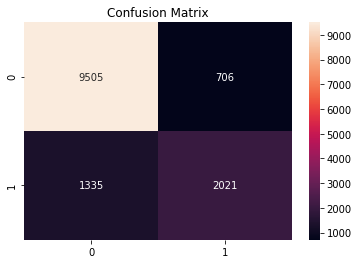

In [462]:
con=metrics.confusion_matrix(y_test,y_pred)

sns.heatmap(con, annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.show()

<b> Decision tree

In [465]:
#training
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train,y_train)                                

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [466]:
#prediction
y_test_pred=classifier.predict(X_test)

In [467]:
#calculating accuracy of class prediction
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred)


0.8253851256725879

In [468]:
#confusion metric
con_metric=metrics.confusion_matrix(y_test,y_test_pred)
con_metric

array([[9706,  505],
       [1864, 1492]])

ValueError: ignored

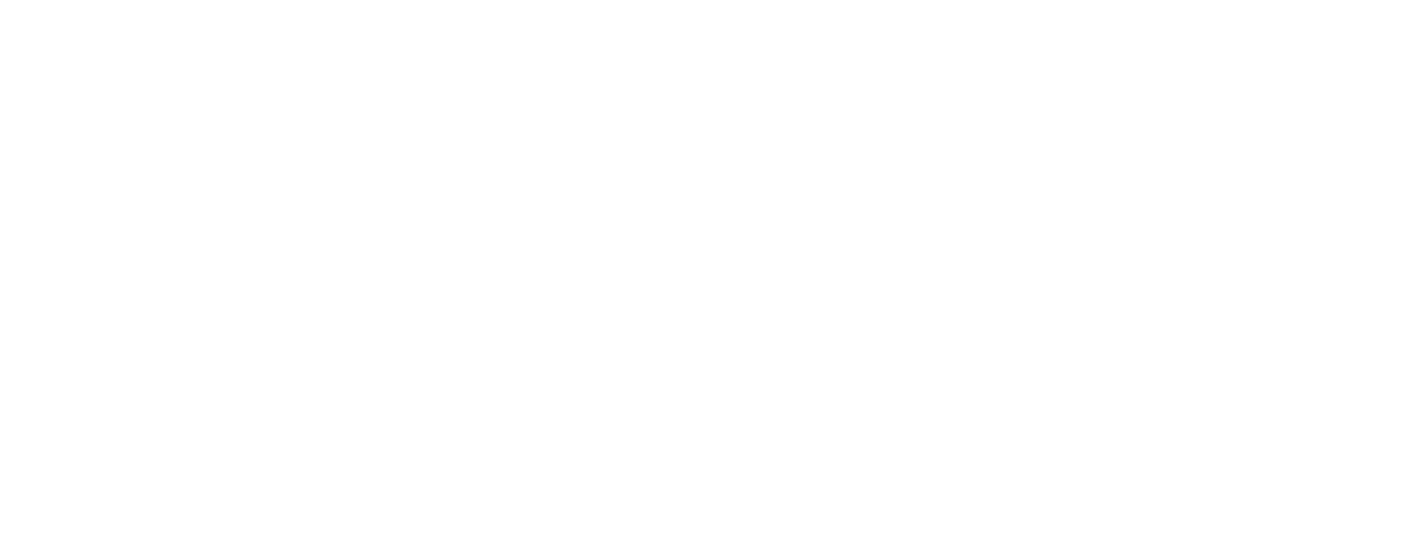

In [471]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
T=plot_tree(classifier,feature_names=X_train.columns,class_names=[income],filled=True,rounded=True,fontsize=14)
                                                          


In [472]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_test_pred)

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10211
         1.0       0.74      0.60      0.66      3356

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.78     13567
weighted avg       0.84      0.85      0.84     13567



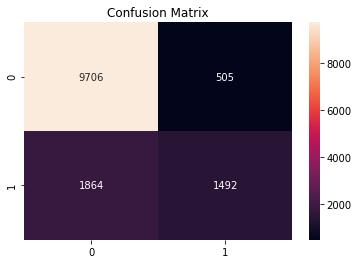

In [473]:
con=metrics.confusion_matrix(y_test,y_test_pred)
sns.heatmap(con,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.show()

<b> SVM

In [480]:
#Training
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [481]:
y_test_pred=classifier.predict(X_train)

In [482]:
#calculating accuracy of class prediction
from sklearn  import metrics
print(metrics.accuracy_score(y_test,y_test_pred

SyntaxError: ignored

In [ ]:
con_metric=metrics.confusion_matrix(y_test,y_test_pred)
con_metric

In [ ]:
#plotting heatmap for confusion metric
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric,annot=True,fmt='d')
plt.tittle("Confusion Matrix")
plt.show()